- id: building id
- Year_Factor: anonymized year in which the weather and energy usage factors were observed
- State_Factor: anonymized state in which the building is located
- building_class: building classification
- facility_type: building usage type
- floor_area: floor area (in square feet) of the building
- year_built: year in which the building was constructed
- energy_star_rating: the energy star rating of the building
- ELEVATION: elevation of the building location
- january_min_temp: minimum temperature in January (in Fahrenheit) at the location of the building
- january_avg_temp: average temperature in January (in Fahrenheit) at the location of the building
- january_max_temp: maximum temperature in January (in Fahrenheit) at the location of the building
- cooling_degree_days: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.
- heating_degree_days: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.
- precipitation_inches: annual precipitation in inches at the location of the building
- snowfall_inches: annual snowfall in inches at the location of the building
- snowdepth_inches: annual snow depth in inches at the location of the building
- avg_temp: average temperature over a year at the location of the building
- days_below_30F: total number of days below 30 degrees Fahrenheit at the location of the building
- days_below_20F: total number of days below 20 degrees Fahrenheit at the location of the building
- days_below_10F: total number of days below 10 degrees Fahrenheit at the location of the building
- days_below_0F: total number of days below 0 degrees Fahrenheit at the location of the building
- days_above_80F: total number of days above 80 degrees Fahrenheit at the location of the building
- days_above_90F: total number of days above 90 degrees Fahrenheit at the location of the building
- days_above_100F: total number of days above 100 degrees Fahrenheit at the location of the building
- days_above_110F: total number of days above 110 degrees Fahrenheit at the location of the building
- direction_max_wind_speed: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).
- direction_peak_wind_speed: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).
- max_wind_speed: maximum wind speed at the location of the building
- days_with_fog: number of days with fog at the location of the building

In [ ]:
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectFromModel, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor as xgb
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train_data = pd.read_csv('train.csv').set_index('id')
train_data.head(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
id,,,,,,,,,,,,,,,,,,,,,
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395


In [3]:
test_data = pd.read_csv('test.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75757 entries, 0 to 75756
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [6]:
train_data.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,0.000000,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,0.000000,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,0.000000,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,31.000000,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120


<AxesSubplot:xlabel='State_Factor', ylabel='Count'>

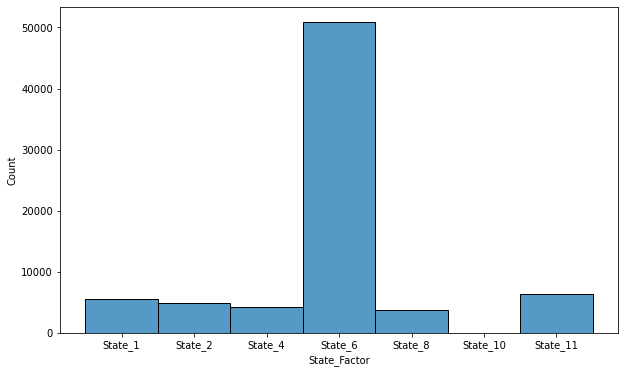

In [137]:
plt.figure(figsize=(10,6))
sns.histplot(x=train_data.State_Factor)

<AxesSubplot:xlabel='building_class', ylabel='count'>

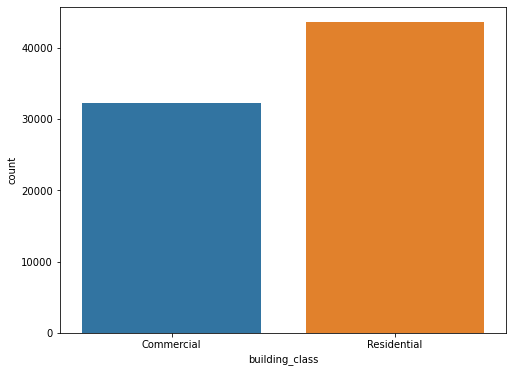

In [138]:
plt.figure(figsize=(8,6))
sns.countplot(x=train_data.building_class)

<AxesSubplot:xlabel='State_Factor', ylabel='count'>

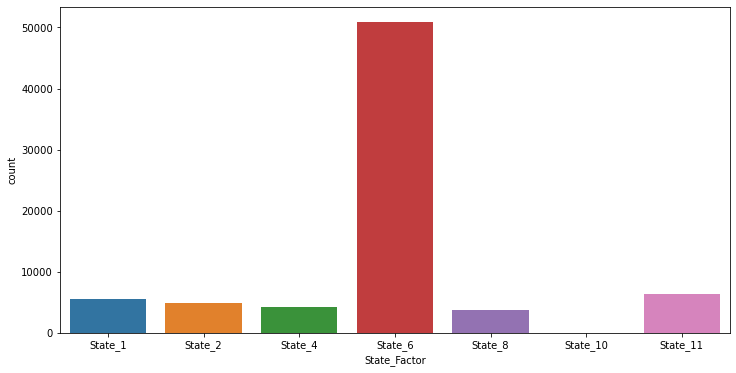

In [139]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_data.State_Factor)

In [140]:
states = train_data.State_Factor.value_counts()
states

State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: State_Factor, dtype: int64

<AxesSubplot:xlabel='building_class', ylabel='count'>

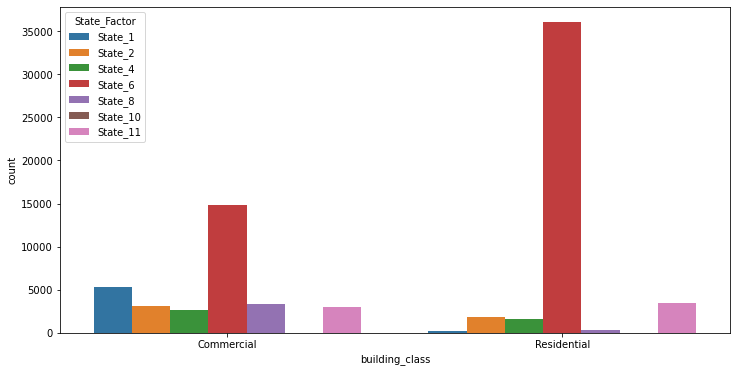

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_data.building_class, hue=train_data.State_Factor)

In [11]:
states_by_buildung_class = train_data.groupby(['State_Factor', 'building_class']).aggregate({'building_class': 'count'})
states_by_buildung_class

building_class
State_Factor building_class                
State_1      Commercial                5350
             Residential                268
State_10     Commercial                  15
State_11     Commercial                2996
             Residential               3416
State_2      Commercial                3069
             Residential               1802
State_4      Commercial                2634
             Residential               1666
State_6      Commercial               14819
             Residential              36021
State_8      Commercial                3316
             Residential                385

Зданий в состоянии State_10 меньше всего - 15. Все эти здания являются Коммерческими.

<AxesSubplot:xlabel='count', ylabel='facility_type'>

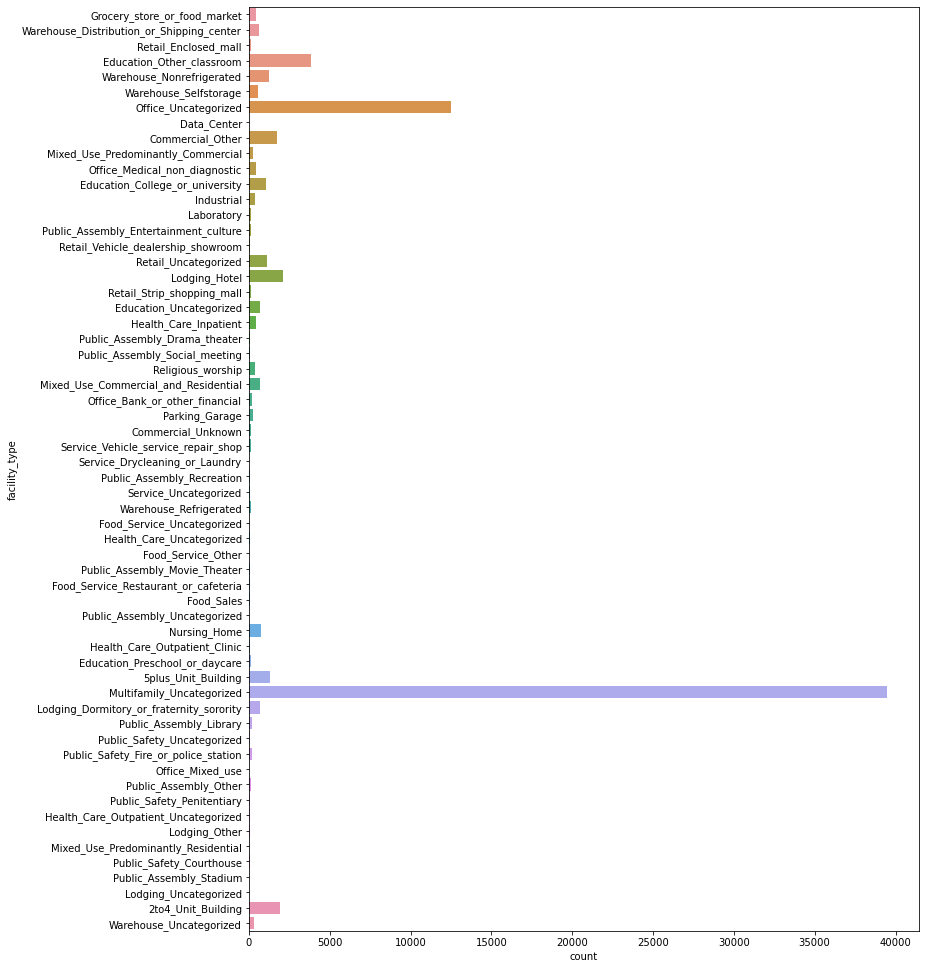

In [12]:
plt.figure(figsize=(12, 17))
sns.countplot(y=train_data.facility_type)

In [13]:
facility = train_data.facility_type.value_counts()
facility

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

Больше всего - многоквартирных домов и офисов. Меньше всего - помещений, сдаваемых в аренду.

In [14]:
train_data.loc[(train_data['year_built'] < 1700), 'year_built'] = 1600
train_data.loc[(train_data['year_built'] < 1800) & (train_data['year_built'] > 1700), 'year_built'] = 1700
train_data.loc[(train_data['year_built'] < 1900) & (train_data['year_built'] > 1800), 'year_built'] = 1800
train_data.loc[(train_data['year_built'] < 1910) & (train_data['year_built'] > 1900), 'year_built'] = 1900
train_data.loc[(train_data['year_built'] < 1920) & (train_data['year_built'] > 1910), 'year_built'] = 1910
train_data.loc[(train_data['year_built'] < 1930) & (train_data['year_built'] > 1920), 'year_built'] = 1920
train_data.loc[(train_data['year_built'] < 1940) & (train_data['year_built'] > 1930), 'year_built'] = 1930
train_data.loc[(train_data['year_built'] < 1950) & (train_data['year_built'] > 1940), 'year_built'] = 1940
train_data.loc[(train_data['year_built'] < 1960) & (train_data['year_built'] > 1950), 'year_built'] = 1950
train_data.loc[(train_data['year_built'] < 1970) & (train_data['year_built'] > 1960), 'year_built'] = 1960
train_data.loc[(train_data['year_built'] < 1980) & (train_data['year_built'] > 1970), 'year_built'] = 1970
train_data.loc[(train_data['year_built'] < 1990) & (train_data['year_built'] > 1980), 'year_built'] = 1980
train_data.loc[(train_data['year_built'] < 2000) & (train_data['year_built'] > 1990), 'year_built'] = 1990
train_data.loc[(train_data['year_built'] < 2010) & (train_data['year_built'] > 2000), 'year_built'] = 2000
train_data.loc[(train_data['year_built'] < 1915) & (train_data['year_built'] > 2010), 'year_built'] = 2010

In [15]:
train_data.year_built.value_counts()

1920.0    14070
1960.0     9092
1930.0     7326
2000.0     7109
1950.0     6771
1980.0     5497
1970.0     4964
1910.0     4757
1900.0     4391
1940.0     3685
1990.0     3334
1800.0     1004
2010.0      485
2013.0      398
2012.0      353
2011.0      279
2014.0      269
2015.0      111
1600.0       16
1700.0        9
Name: year_built, dtype: int64

<AxesSubplot:xlabel='year_built', ylabel='count'>

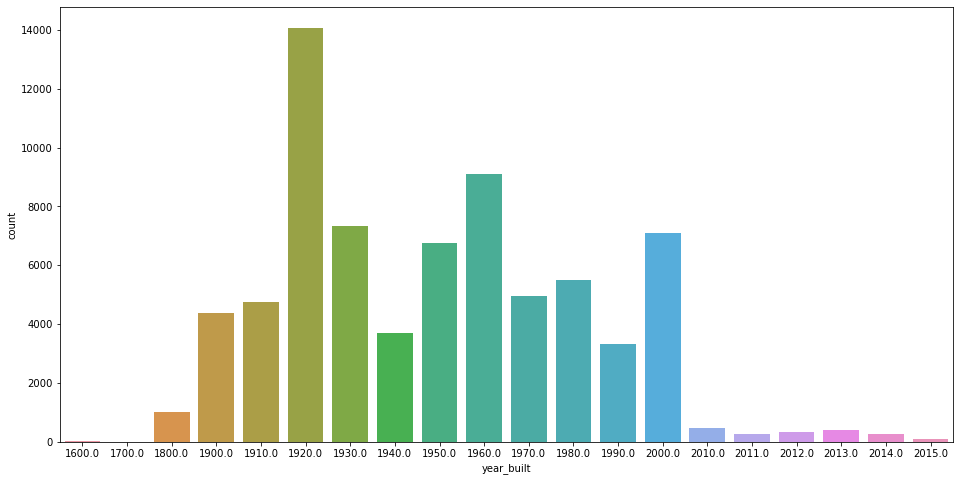

In [16]:
plt.figure(figsize=(16, 8))
sns.countplot(x=train_data.year_built)

<AxesSubplot:xlabel='energy_star_rating', ylabel='count'>

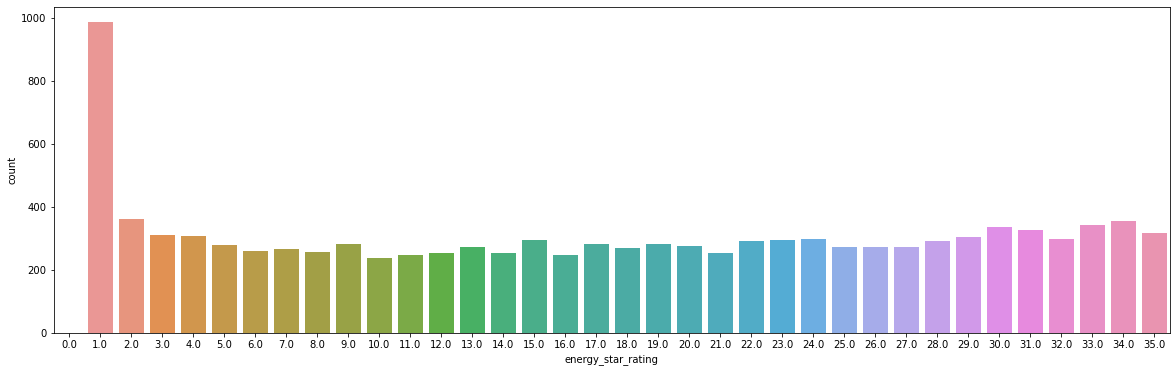

In [17]:
sr_1_35 = train_data.loc[train_data.energy_star_rating < 36]
plt.figure(figsize=(20, 6))
sns.countplot(x=sr_1_35.energy_star_rating)

<AxesSubplot:xlabel='energy_star_rating', ylabel='count'>

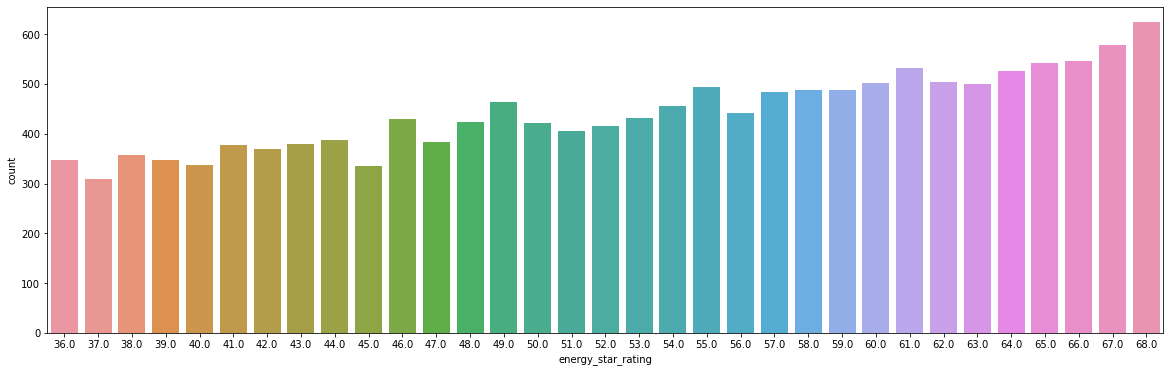

In [18]:
sr_36_68 = train_data.loc[(train_data.energy_star_rating > 35) & (train_data.energy_star_rating < 69)]
plt.figure(figsize=(20, 6))
sns.countplot(x=sr_36_68.energy_star_rating)

<AxesSubplot:xlabel='energy_star_rating', ylabel='count'>

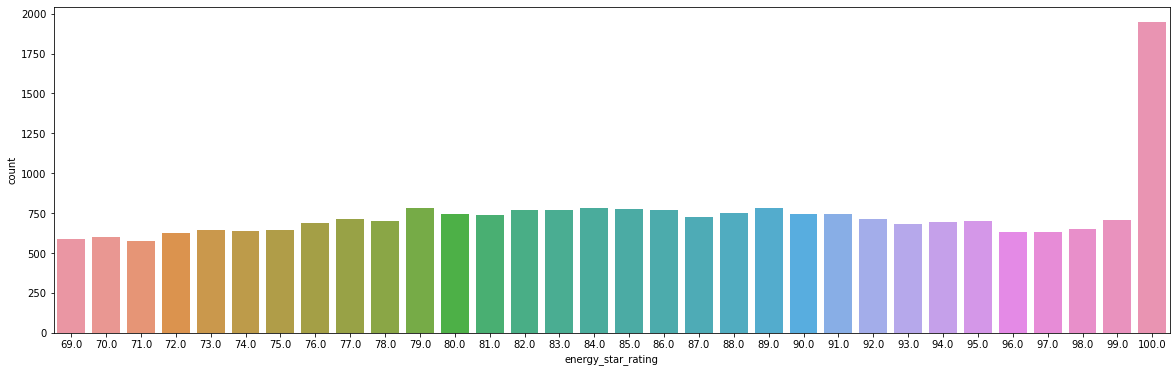

In [19]:
sr_69_100 = train_data.loc[(train_data.energy_star_rating > 68) & (train_data.energy_star_rating <= 100)]
plt.figure(figsize=(20, 6))
sns.countplot(x=sr_69_100.energy_star_rating)

In [20]:
train_data.energy_star_rating.value_counts().sort_values()

0.0         1
10.0      237
11.0      247
16.0      248
21.0      252
         ... 
89.0      781
84.0      781
79.0      782
1.0       985
100.0    1946
Name: energy_star_rating, Length: 101, dtype: int64

Больше всего зданий с рейтингом 100, 1, 79, 84, 89. (Топ-5)

<AxesSubplot:xlabel='energy_star_rating', ylabel='floor_area'>

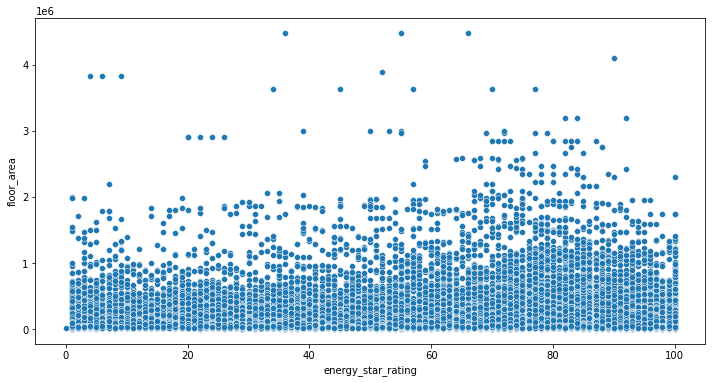

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_data.energy_star_rating, y=train_data.floor_area)

<AxesSubplot:xlabel='site_eui', ylabel='Count'>

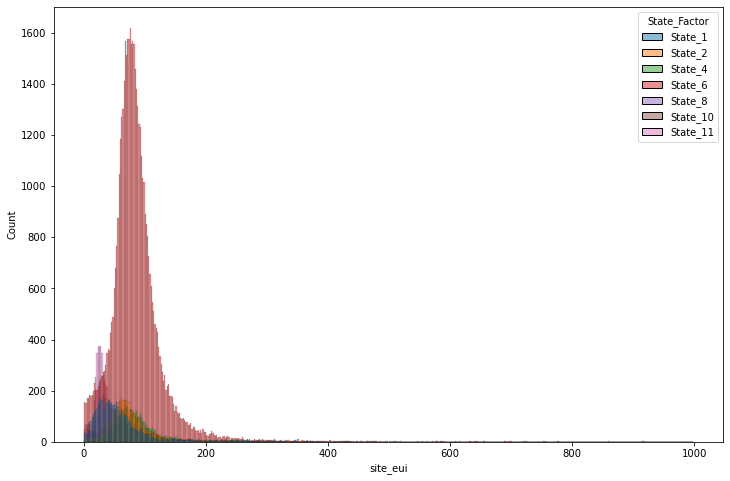

In [22]:
plt.figure(figsize=(12,8))
sns.histplot(x = train_data.site_eui, hue=train_data.State_Factor)

<AxesSubplot:xlabel='State_Factor', ylabel='site_eui'>

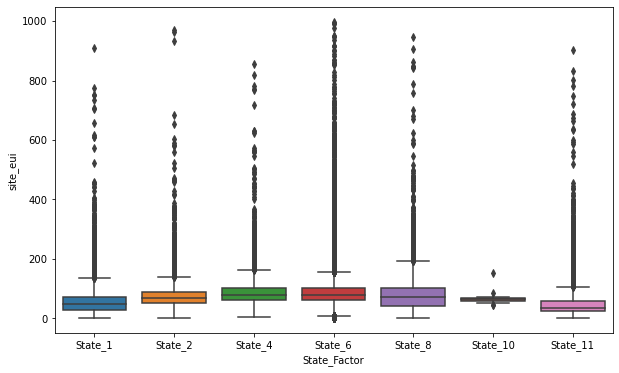

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train_data.State_Factor, y=train_data.site_eui)

<AxesSubplot:xlabel='facility_type'>

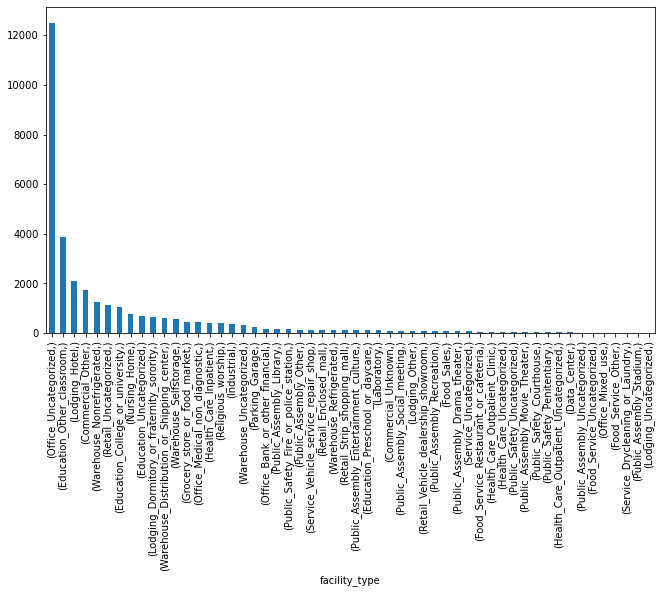

In [24]:
plt.figure(figsize=(24,6))

plt.subplot(1, 2, 1)
train_data[train_data['building_class']=='Commercial'][['facility_type']].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='facility_type'>

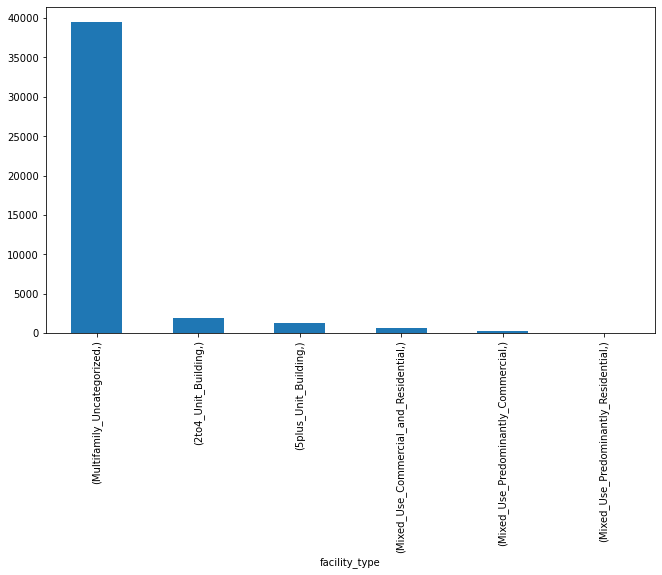

In [25]:
plt.figure(figsize=(24,6))

plt.subplot(1, 2, 1)
train_data[train_data['building_class']=='Residential'][['facility_type']].value_counts().plot(kind='bar')

- More buildings State_6, less - State_10. (15 commercial, non-residential)
- There are more residential buildings than commercial ones.
- By "facility_type" more apartment buildings and offices. Least of all - accommodation.
- Most of the buildings were built in the 1920s, 1960s and 2000s.
- Most buildings with Energy_Star_rating 100, 1, 79, 84, 89.
- Energy consumption from commercial buildings is greater than from residential buildings (+ in proportion to the floor area).
- More energy consumption from State_6 buildings.
- More energy consumption from new buildings (+ also depends on the type of building)
- Energy_star_rating is distributed almost evenly over the area of the room.

<AxesSubplot:xlabel='State_Factor', ylabel='avg_temp'>

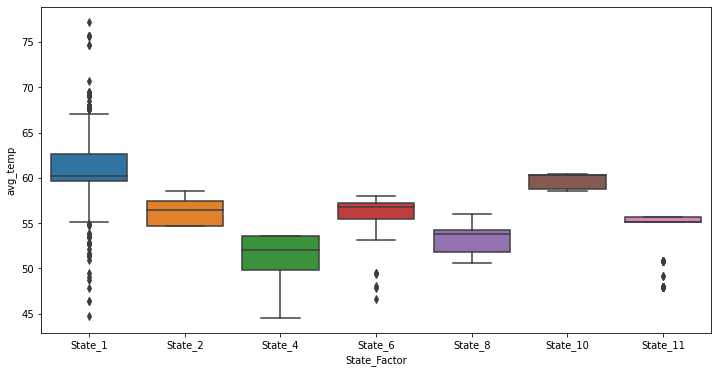

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x=train_data.State_Factor, y=train_data.avg_temp)

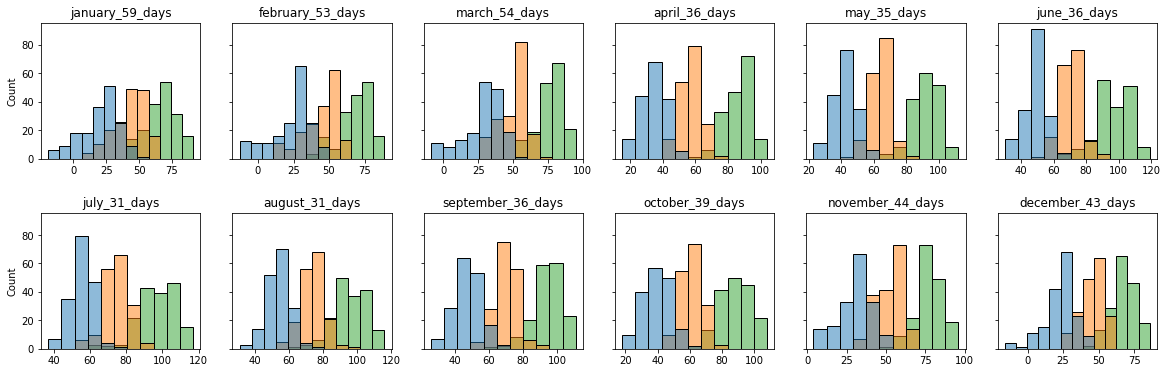

In [27]:
month_temp = [['january_min_temp', 'january_avg_temp', 'january_max_temp'],
        ['february_min_temp', 'february_avg_temp', 'february_max_temp'],
        ['march_min_temp', 'march_avg_temp', 'march_max_temp'],
        ['april_min_temp','april_avg_temp', 'april_max_temp'],
        ['may_min_temp', 'may_avg_temp','may_max_temp'],
        ['june_min_temp', 'june_avg_temp', 'june_max_temp'],
        ['july_min_temp', 'july_avg_temp', 'july_max_temp'],
        ['august_min_temp','august_avg_temp', 'august_max_temp'],
        ['september_min_temp','september_avg_temp', 'september_max_temp'],
        ['october_min_temp','october_avg_temp', 'october_max_temp'],
        ['november_min_temp','november_avg_temp', 'november_max_temp'],
        ['december_min_temp','december_avg_temp', 'december_max_temp']]

fig, ax = plt.subplots(2, 6, figsize=(20,6), sharey=True)

for month, temp in enumerate(month_temp):
        if month<=5:
                sns.histplot(train_data[temp].drop_duplicates(), ax=ax[0,month], legend=False).set(title=temp[0][:temp[0].find('_')]+ '_'+str(len(train_data[temp[0]].unique()))+"_days")
        else:
                sns.histplot(train_data[temp].drop_duplicates(), ax=ax[1,month-6], legend=False).set(title=temp[0][:temp[0].find('_')]+ '_'+str(len(train_data[temp[0]].unique()))+"_days")

plt.subplots_adjust(hspace=0.4)

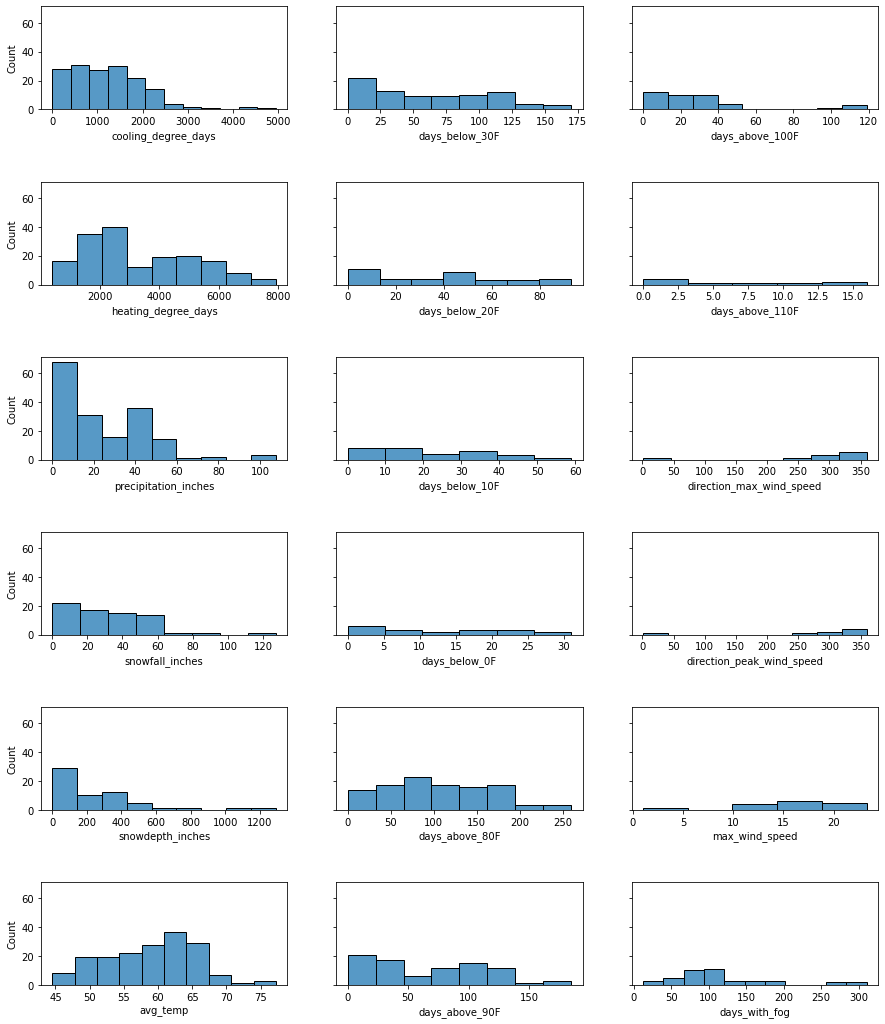

In [28]:
cols=['cooling_degree_days','heating_degree_days', 'precipitation_inches', 'snowfall_inches',
      'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
      'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
      'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
      'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
fig, ax = plt.subplots(6,3, figsize=(15,18), sharey=True)
for i, j in enumerate(cols):
    if i <= 5:
        sns.histplot(train_data[j].drop_duplicates(), ax=ax[i,0])
    elif 6 <= i <= 11:
        sns.histplot(train_data[j].drop_duplicates(), ax=ax[i-6,1])
    else:
        sns.histplot(train_data[j].drop_duplicates(), ax=ax[i-12,2])

plt.subplots_adjust(hspace=0.7)

<AxesSubplot:xlabel='floor_area', ylabel='site_eui'>

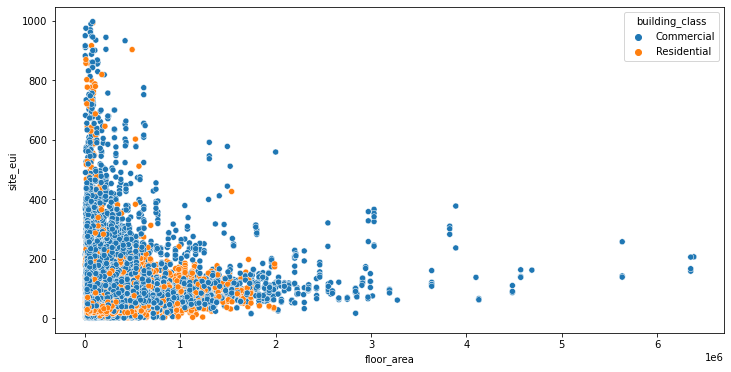

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_data.floor_area, y=train_data.site_eui, hue=train_data.building_class)

<AxesSubplot:xlabel='avg_temp', ylabel='site_eui'>

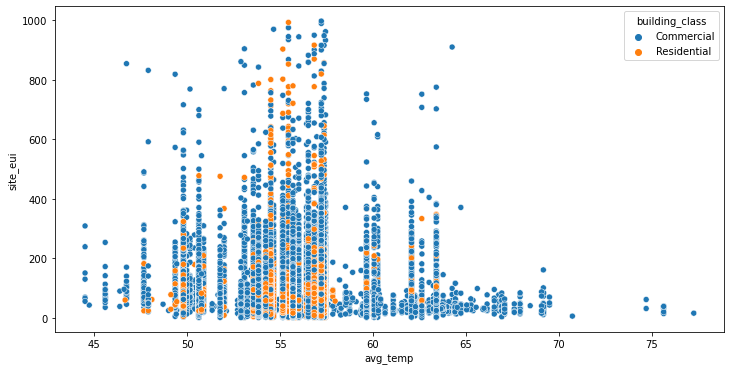

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_data.avg_temp, y=train_data.site_eui, hue=train_data.building_class)

<AxesSubplot:xlabel='ELEVATION', ylabel='site_eui'>

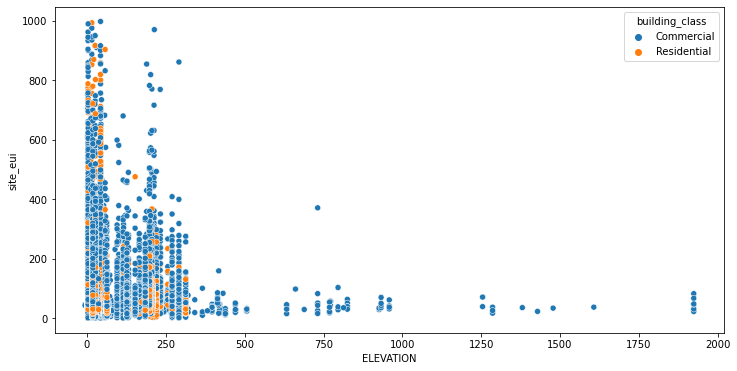

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_data.ELEVATION, y=train_data.site_eui,hue=train_data.building_class)

<AxesSubplot:xlabel='year_built', ylabel='site_eui'>

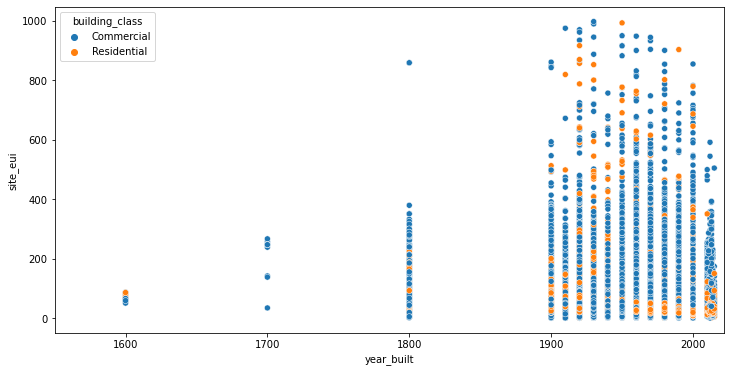

In [32]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(1550, 2022)
sns.scatterplot(x=train_data.year_built, y=train_data.site_eui, hue=train_data.building_class)

<AxesSubplot:xlabel='energy_star_rating', ylabel='site_eui'>

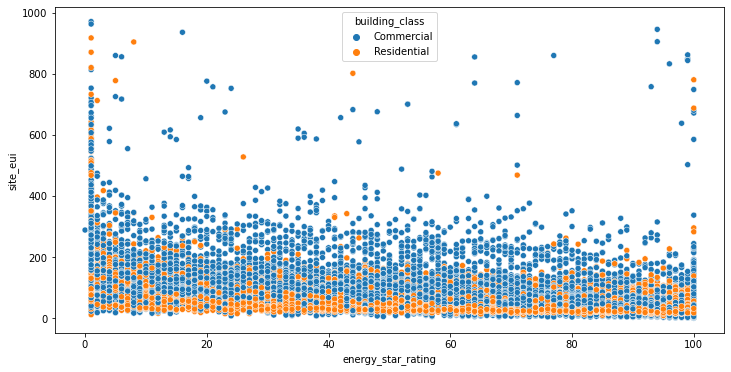

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_data.energy_star_rating, y=train_data.site_eui,hue=train_data.building_class)

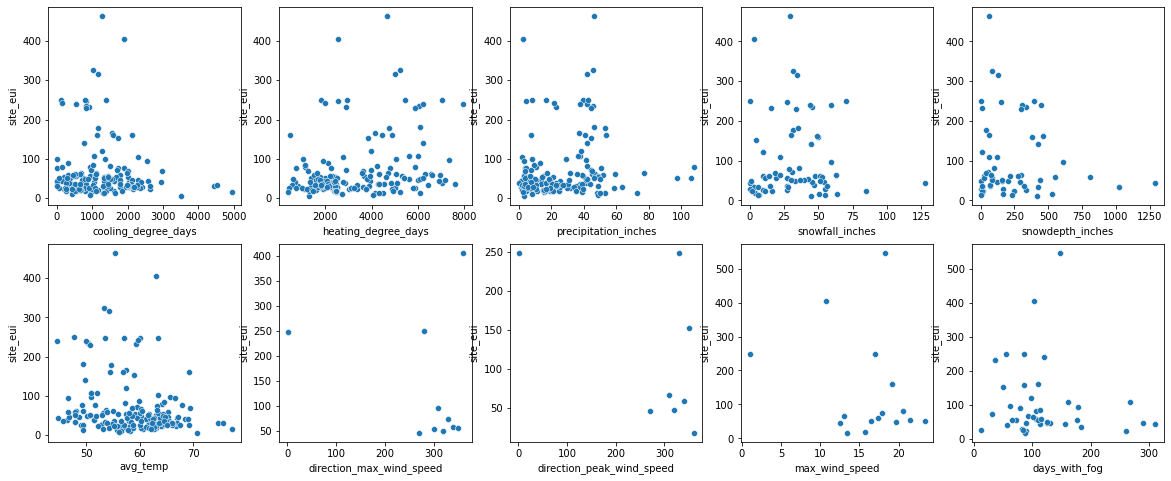

In [34]:
cols=['','cooling_degree_days','heating_degree_days', 'precipitation_inches', 'snowfall_inches',
      'snowdepth_inches', 'avg_temp', 'direction_max_wind_speed',
      'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
plt.figure(figsize=(20,8))

for idx in range(1,len(cols)):
    plt.subplot(2, 5, idx)
    sns.scatterplot(x=train_data[cols[idx]].drop_duplicates(), y=train_data.site_eui)

In [36]:
new_train = copy.deepcopy(train_data)

In [37]:
new_train = new_train.drop(['direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog', 'energy_star_rating'] , axis = 1)
new_train.shape

(75757, 58)

In [38]:
year_mode = new_train['year_built'].mode()
year_mode

0    1927.0
Name: year_built, dtype: float64

In [39]:
new_train['year_built'] = new_train['year_built'].fillna(1927)

In [40]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75757 entries, 0 to 75756
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year_Factor           75757 non-null  int64  
 1   State_Factor          75757 non-null  object 
 2   building_class        75757 non-null  object 
 3   facility_type         75757 non-null  object 
 4   floor_area            75757 non-null  float64
 5   year_built            75757 non-null  float64
 6   ELEVATION             75757 non-null  float64
 7   january_min_temp      75757 non-null  int64  
 8   january_avg_temp      75757 non-null  float64
 9   january_max_temp      75757 non-null  int64  
 10  february_min_temp     75757 non-null  int64  
 11  february_avg_temp     75757 non-null  float64
 12  february_max_temp     75757 non-null  int64  
 13  march_min_temp        75757 non-null  int64  
 14  march_avg_temp        75757 non-null  float64
 15  march_max_temp     

In [11]:
new_train['winter_avg_temp'] = (new_train.january_avg_temp + new_train.february_avg_temp + new_train.december_avg_temp) / 3
new_train['winter_min_temp'] = (new_train.december_min_temp + new_train.january_min_temp + new_train.february_min_temp) / 3
new_train['winter_max_temp'] = (new_train.december_max_temp + new_train.january_max_temp + new_train.february_max_temp) / 3

In [12]:
new_train['spring_avg_temp'] = (new_train.march_avg_temp + new_train.april_avg_temp + new_train.may_avg_temp) / 3
new_train['spring_min_temp'] = (new_train.march_min_temp + new_train.april_min_temp + new_train.may_min_temp) / 3
new_train['spring_max_temp'] = (new_train.march_max_temp + new_train.april_max_temp + new_train.may_max_temp) / 3

In [13]:
new_train['summer_avg_temp'] = (new_train.june_avg_temp + new_train.july_avg_temp + new_train.august_avg_temp) / 3
new_train['summer_min_temp'] = (new_train.june_min_temp + new_train.july_min_temp + new_train.august_min_temp) / 3
new_train['summer_max_temp'] = (new_train.june_max_temp + new_train.july_max_temp + new_train.august_max_temp) / 3

In [14]:
new_train['autumn_avg_temp'] = (new_train.september_avg_temp + new_train.october_avg_temp + new_train.november_avg_temp) / 3
new_train['autumn_min_temp'] = (new_train.september_min_temp + new_train.october_min_temp + new_train.november_min_temp) / 3
new_train['autumn_max_temp'] = (new_train.september_max_temp + new_train.october_max_temp + new_train.november_max_temp) / 3

In [15]:
new_train = new_train.drop(['january_avg_temp','january_min_temp','january_max_temp','february_avg_temp', 'february_min_temp', 'february_max_temp', 'march_avg_temp', 'march_min_temp', 'march_max_temp', 'april_avg_temp', 'april_min_temp', 'april_max_temp', 'may_avg_temp', 'may_min_temp', 'may_max_temp', 'june_avg_temp', 'june_min_temp', 'june_max_temp', 'july_avg_temp', 'july_min_temp', 'july_max_temp', 'august_avg_temp', 'august_min_temp', 'august_max_temp', 'september_avg_temp', 'september_min_temp', 'september_max_temp', 'october_avg_temp', 'october_min_temp', 'october_max_temp', 'november_avg_temp', 'november_min_temp', 'november_max_temp', 'december_avg_temp', 'december_min_temp', 'december_max_temp'] , axis = 1)
new_train.shape

(75757, 34)

In [11]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75757 entries, 0 to 75756
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 75757 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [41]:
encoder = LabelEncoder()
new_train['State_Factor'] = encoder.fit_transform(new_train.State_Factor)
new_train['building_class'] = encoder.fit_transform(new_train.building_class)
new_train['facility_type'] = encoder.fit_transform(new_train.facility_type)

In [42]:
new_train.head(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,...,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,13,61242.0,1942.0,2.4,36,50.5,68,...,56.972603,0,0,0,0,14,0,0,0,248.682615
1,1,0,0,55,274000.0,1955.0,1.8,36,50.5,68,...,56.972603,0,0,0,0,14,0,0,0,26.500150
2,1,0,0,48,280025.0,1951.0,1.8,36,50.5,68,...,56.972603,0,0,0,0,14,0,0,0,24.693619
3,1,0,0,6,55325.0,1980.0,1.8,36,50.5,68,...,56.972603,0,0,0,0,14,0,0,0,48.406926
4,1,0,0,56,66000.0,1985.0,2.4,36,50.5,68,...,56.972603,0,0,0,0,14,0,0,0,3.899395


In [43]:
new_test = copy.deepcopy(test_data)

In [44]:
new_test = new_test.drop(['direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog', 'energy_star_rating'] , axis = 1)
new_test.shape

(9705, 58)

In [45]:
year_mode = new_test['year_built'].mode()
year_mode

0    2000.0
Name: year_built, dtype: float64

In [46]:
new_test['year_built'] = new_train['year_built'].fillna(2000)

In [64]:
new_test['winter_avg_temp'] = (new_test.january_avg_temp + new_test.february_avg_temp + new_test.december_avg_temp) / 3
new_test['winter_min_temp'] = (new_test.december_min_temp + new_test.january_min_temp + new_test.february_min_temp) / 3
new_test['winter_max_temp'] = (new_test.december_max_temp + new_test.january_max_temp + new_test.february_max_temp) / 3

In [65]:
new_test['spring_avg_temp'] = (new_test.march_avg_temp + new_test.april_avg_temp + new_test.may_avg_temp) / 3
new_test['spring_min_temp'] = (new_test.march_min_temp + new_test.april_min_temp + new_test.may_min_temp) / 3
new_test['spring_max_temp'] = (new_test.march_max_temp + new_test.april_max_temp + new_test.may_max_temp) / 3

In [66]:
new_test['summer_avg_temp'] = (new_test.june_avg_temp + new_test.july_avg_temp + new_test.august_avg_temp) / 3
new_test['summer_min_temp'] = (new_test.june_min_temp + new_test.july_min_temp + new_test.august_min_temp) / 3
new_test['summer_max_temp'] = (new_test.june_max_temp + new_test.july_max_temp + new_test.august_max_temp) / 3

In [67]:
new_test['autumn_avg_temp'] = (new_test.september_avg_temp + new_test.october_avg_temp + new_test.november_avg_temp) / 3
new_test['autumn_min_temp'] = (new_test.september_min_temp + new_test.october_min_temp + new_test.november_min_temp) / 3
new_test['autumn_max_temp'] = (new_test.september_max_temp + new_test.october_max_temp + new_test.november_max_temp) / 3

In [68]:
new_test = new_test.drop(['january_avg_temp','january_min_temp','january_max_temp','february_avg_temp', 'february_min_temp', 'february_max_temp', 'march_avg_temp', 'march_min_temp', 'march_max_temp', 'april_avg_temp', 'april_min_temp', 'april_max_temp', 'may_avg_temp', 'may_min_temp', 'may_max_temp', 'june_avg_temp', 'june_min_temp', 'june_max_temp', 'july_avg_temp', 'july_min_temp', 'july_max_temp', 'august_avg_temp', 'august_min_temp', 'august_max_temp', 'september_avg_temp', 'september_min_temp', 'september_max_temp', 'october_avg_temp', 'october_min_temp', 'october_max_temp', 'november_avg_temp', 'november_min_temp', 'november_max_temp', 'december_avg_temp', 'december_min_temp', 'december_max_temp'] , axis = 1)
new_test.shape

(9705, 34)

In [47]:
new_test['State_Factor'] = encoder.fit_transform(new_test.State_Factor)
new_test['building_class'] = encoder.fit_transform(new_test.building_class)
new_test['facility_type'] = encoder.fit_transform(new_test.facility_type)
new_test.shape

(9705, 58)

In [48]:
new_test.head(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,...,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,id
0,7,0,0,13,28484.0,1942.0,2.4,38,50.596774,64,...,59.894521,0,0,0,0,29,5,2,0,75757
1,7,0,0,13,21906.0,1955.0,45.7,38,50.596774,64,...,59.894521,0,0,0,0,29,5,2,0,75758
2,7,0,0,13,16138.0,1951.0,59.1,38,50.596774,64,...,59.894521,0,0,0,0,29,5,2,0,75759
3,7,0,0,13,97422.0,1980.0,35.4,38,50.596774,64,...,59.894521,0,0,0,0,29,5,2,0,75760
4,7,0,0,13,61242.0,1985.0,1.8,38,50.596774,64,...,59.894521,0,0,0,0,29,5,2,0,75761


<AxesSubplot:>

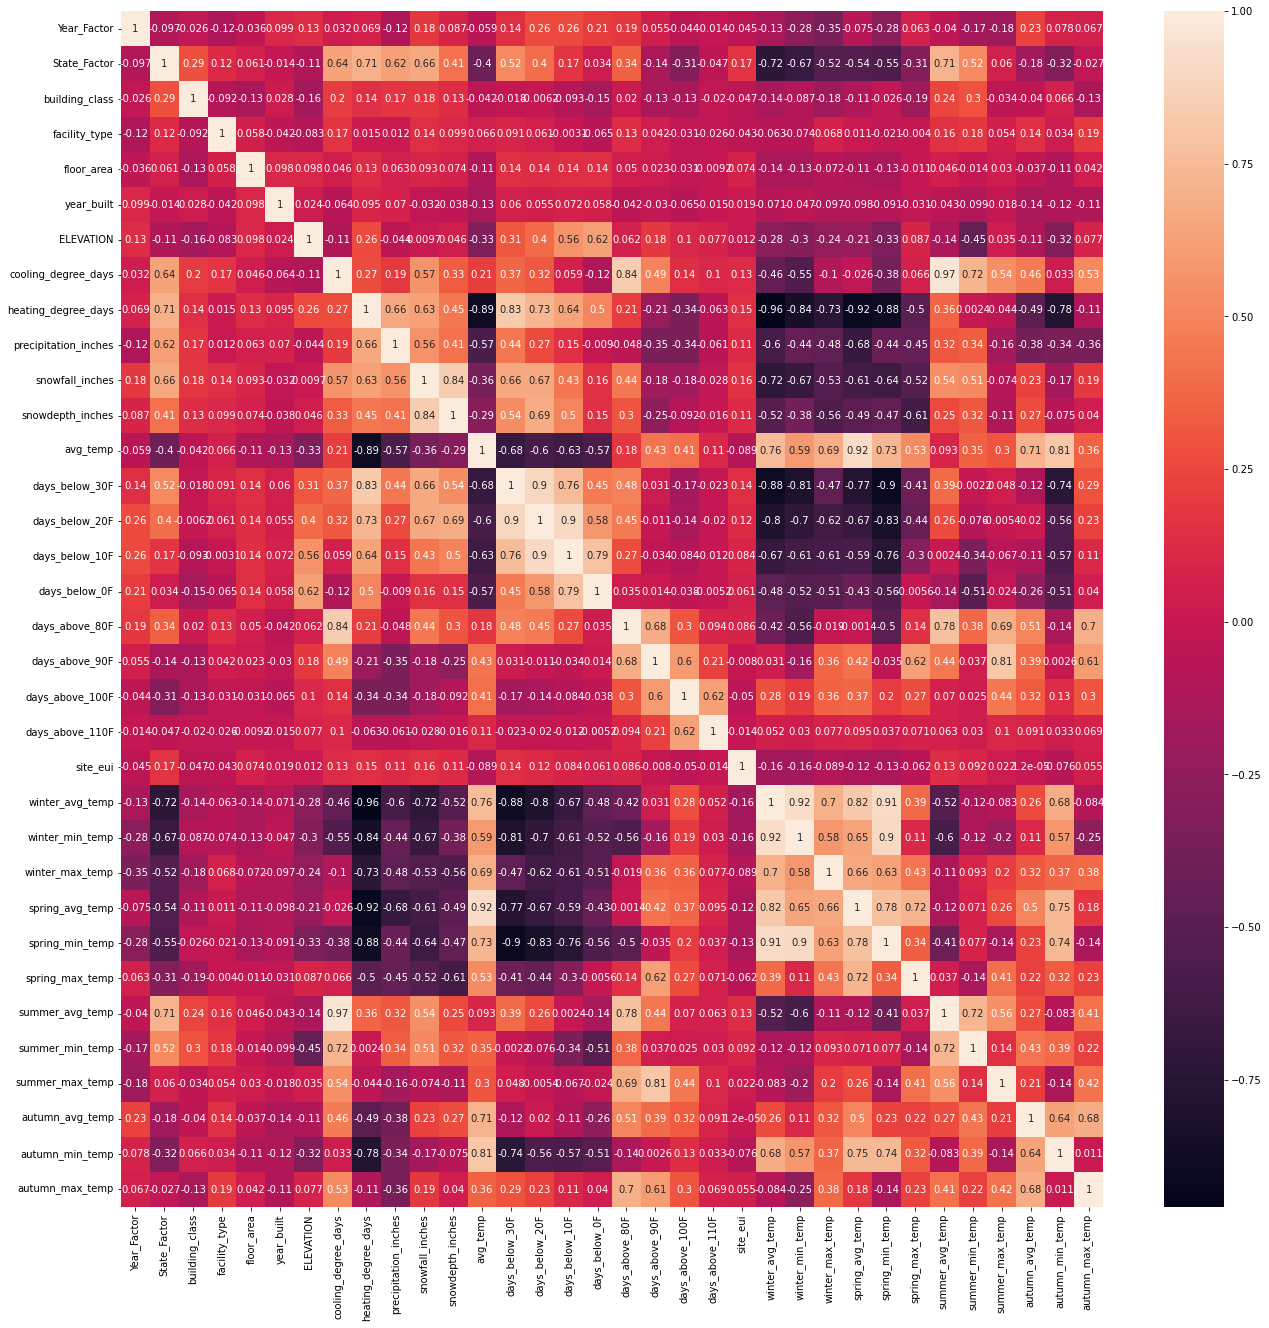

In [95]:
plt.figure(figsize=(22, 22))
sns.heatmap(new_train.corr(), annot=True)

In [49]:
y = new_train.site_eui
X = new_train.drop('site_eui', axis=1)

In [50]:
sc = StandardScaler()

In [153]:
# from sklearn.linear_model import Lasso
#
# selector = SelectFromModel(Lasso(alpha=0.1, random_state=10))
# X_new = selector.fit_transform(X, y)
#
# names = X.columns.values[selector.get_support()]

In [95]:
selec = SelectKBest( k=20)
X_new = selec.fit_transform(X, y)

names = X.columns.values[selec.get_support()]

In [96]:
X_pred = new_test[list(names)]

In [97]:
X_pred = sc.fit_transform(X_pred)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [121]:
# from sklearn.linear_model import LinearRegression
#
# reg = LinearRegression()
# reg.fit(X_train, y_train)
# y_pred = reg.predict(X_test)
#
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# rmse

In [122]:
# rf = RandomForestRegressor()
# rf.fit(X_train, y_train)
# pred = rf.predict(X_test)
#
# rmse = mean_squared_error(y_test, pred, squared=False)
# rmse

In [99]:
xg_reg = xgb(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.01, alpha=10,
             interaction_constraints='', learning_rate=0.005, max_delta_step=0,
             max_depth=5, min_child_weight=6,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=13, predictor='auto', random_state=50,
             reg_alpha=0.4, reg_lambda=2e-08, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1)
# 61.499

In [100]:
xg_reg.fit(sc.fit_transform(X_train,y_train), y_train)

preds = xg_reg.predict(sc.transform(X_test))

In [101]:
rmse = mean_squared_error(y_test, preds, squared=False)
rmse

55.20101161885404

In [102]:
data = [test_data['id'], pd.Series(xg_reg.predict(X_pred))]
headers = ['id', 'site_eui']
submission = pd.concat(data, axis=1, keys = headers)
submission.head()

,id,site_eui
0,75757,63.657379
1,75758,62.897755
2,75759,62.897755
3,75760,63.657379
4,75761,63.657379


In [103]:
data = [test_data['id'], pd.Series(xg_reg.predict(X_pred))]
headers = ['id', 'site_eui']
submission = pd.concat(data, axis=1, keys = headers)

print(submission.head())

submission.to_csv('submission41.csv', index = False)

      id   site_eui
0  75757  63.657379
1  75758  62.897755
2  75759  62.897755
3  75760  63.657379
4  75761  63.657379


In [ ]:

def problem(n):
    res = 1
    for i in range(1, n+1):
        res *= i
    return res

print(problem(25))